# Import Libraries 1.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

# Load dataset 2.0

In [3]:
df_main = pd.read_csv('/Users/samir/Documents/Data_science_5projects/Project_2/notebook/data/car data.csv')
df_main

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Dataset Overview 3.0

**Data shape**

In [4]:
df_main.shape

(301, 9)

**Check types**

In [5]:
df_main.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

**Info**

In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Numerical stats**

In [7]:
df_main.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Missing values**

In [8]:
df_main.isna().sum()    

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Data Preparation 4.0

### Feature Transformation 4.1

**Replaceing Year with Age**

In [9]:
df_main['Age'] = 2020 - df_main['Year']
df_processed =  df_main.drop('Year',axis=1,inplace = False)
df_processed.head(5)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


**Drop Car name**

In [10]:
df_processed.drop('Car_Name', axis=1, inplace=True)
df_processed


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


### Outlier Detection 4.2

**Outlier Detection with box plot**

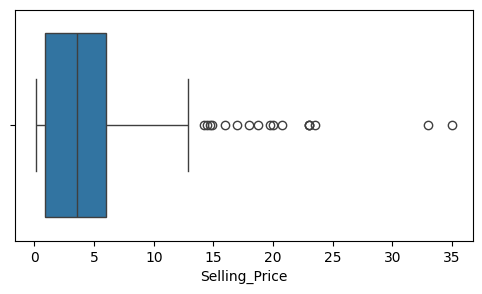

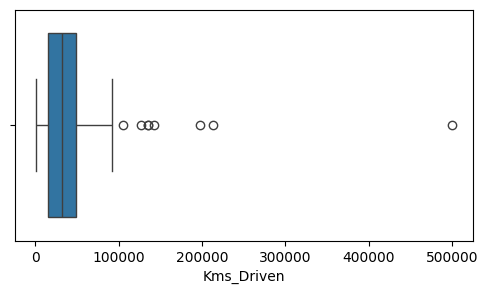

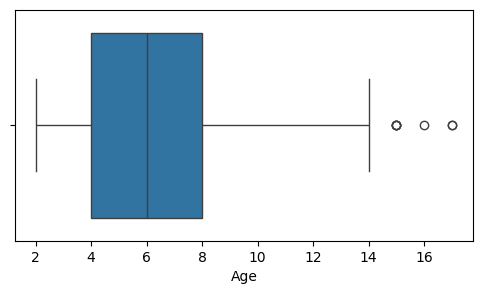

In [11]:
num_cols = ['Selling_Price','Kms_Driven','Age']
i=0
while i < 3:
    fig = plt.figure(figsize=[13,3])

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_processed)
    i += 1
    

    plt.show()

**Finding outliers with IR**

In [12]:
columns_outlier = ['Kms_Driven' ,'Selling_Price','Age']

for i in columns_outlier:
    sorted(df_processed[i])
    quantile1 , quantile3 = np.percentile(df_processed[i], [25,75])
    iqr_value = quantile3 - quantile1


    lower_bound_val = quantile1 - (1.5 * iqr_value)
    upper_bound_val = quantile3 + (1.5 * iqr_value)
    print(lower_bound_val , upper_bound_val)

    print(df_processed.shape)
    df_processed = df_processed[(df_processed[i] < upper_bound_val ) & (df_processed[i]> lower_bound_val)]
    df_processed.shape



-35650.5 99417.5
(301, 8)
-6.749999999999999 13.649999999999999
(293, 8)
-2.0 14.0
(278, 8)


# Exploratory Data Analysis (EDA) 5.0

### Checking uniqe values 5.1

In [13]:
print(df_processed['Fuel_Type'].unique())
print(df_processed['Seller_Type'].unique())
print(df_processed['Transmission'].unique())
print(df_processed['Owner'].unique())
print((df_processed['Fuel_Type'] == 'Petrol').value_counts())
fuel = ['Petrol','Diesel' ,'CNG' ,'LPG' ,'Electric']
owner = ['First Owner','Second Owner','Fourth & Above Owner','Third Owner','Test Drive Car']
transmission = ['Manual','Automatic']
seller_type = ['Individual','Dealer','Trustmark Dealer']

columns_arr = [fuel ,owner ,transmission,seller_type ]
columns_arr_str = ['Fuel_Type' ,'Seller_Type' ,'Transmission','Owner' ]

for x in range(4):
    for y in columns_arr[x]: 
        print(y)
        print((df_processed[columns_arr_str[x]] == y).value_counts())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1]
Fuel_Type
True     224
False     47
Name: count, dtype: int64
Petrol
Fuel_Type
True     224
False     47
Name: count, dtype: int64
Diesel
Fuel_Type
False    226
True      45
Name: count, dtype: int64
CNG
Fuel_Type
False    269
True       2
Name: count, dtype: int64
LPG
Fuel_Type
False    271
Name: count, dtype: int64
Electric
Fuel_Type
False    271
Name: count, dtype: int64
First Owner
Seller_Type
False    271
Name: count, dtype: int64
Second Owner
Seller_Type
False    271
Name: count, dtype: int64
Fourth & Above Owner
Seller_Type
False    271
Name: count, dtype: int64
Third Owner
Seller_Type
False    271
Name: count, dtype: int64
Test Drive Car
Seller_Type
False    271
Name: count, dtype: int64
Manual
Transmission
True     247
False     24
Name: count, dtype: int64
Automatic
Transmission
False    247
True      24
Name: count, dtype: int64
Individual
Owner
False    271
Name: count, dtype: int64
Dealer
Owner


### Unique values comparison 5.2

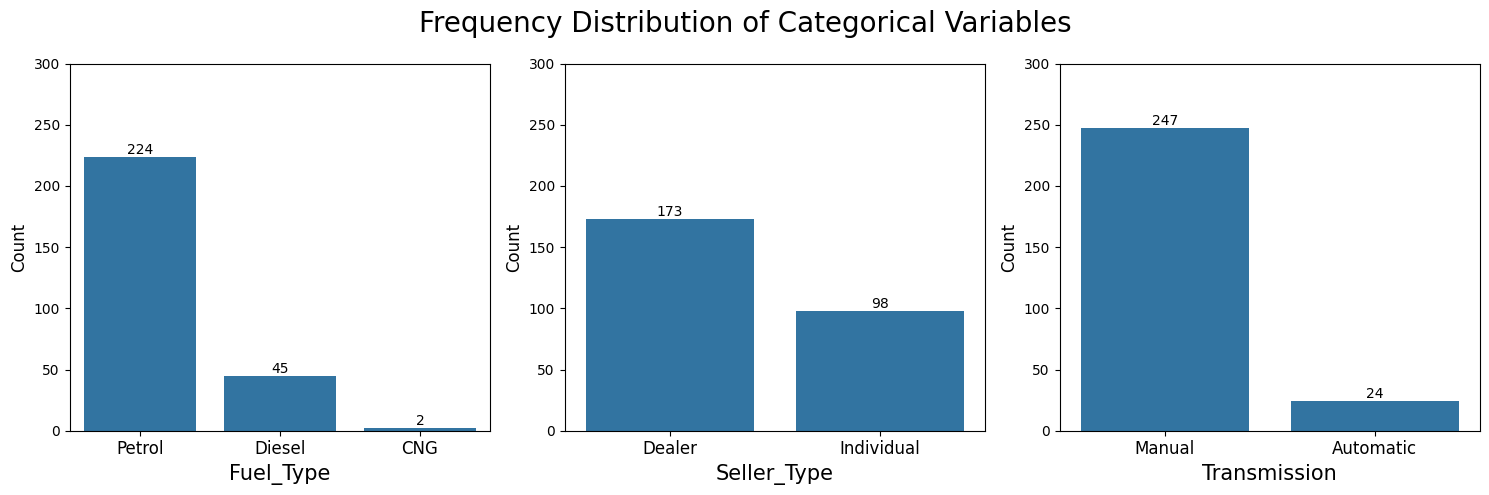

In [14]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
       
for i in range(len(CatCols)):
    graph = sns.countplot(x=CatCols[i], data=df_processed, ax=ax[i])
    ax[i].set_xlabel(CatCols[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,300])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    for cont in graph.containers:
        graph.bar_label(cont)

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()
plt.show()


### Distrubutions of continuous values 5.3

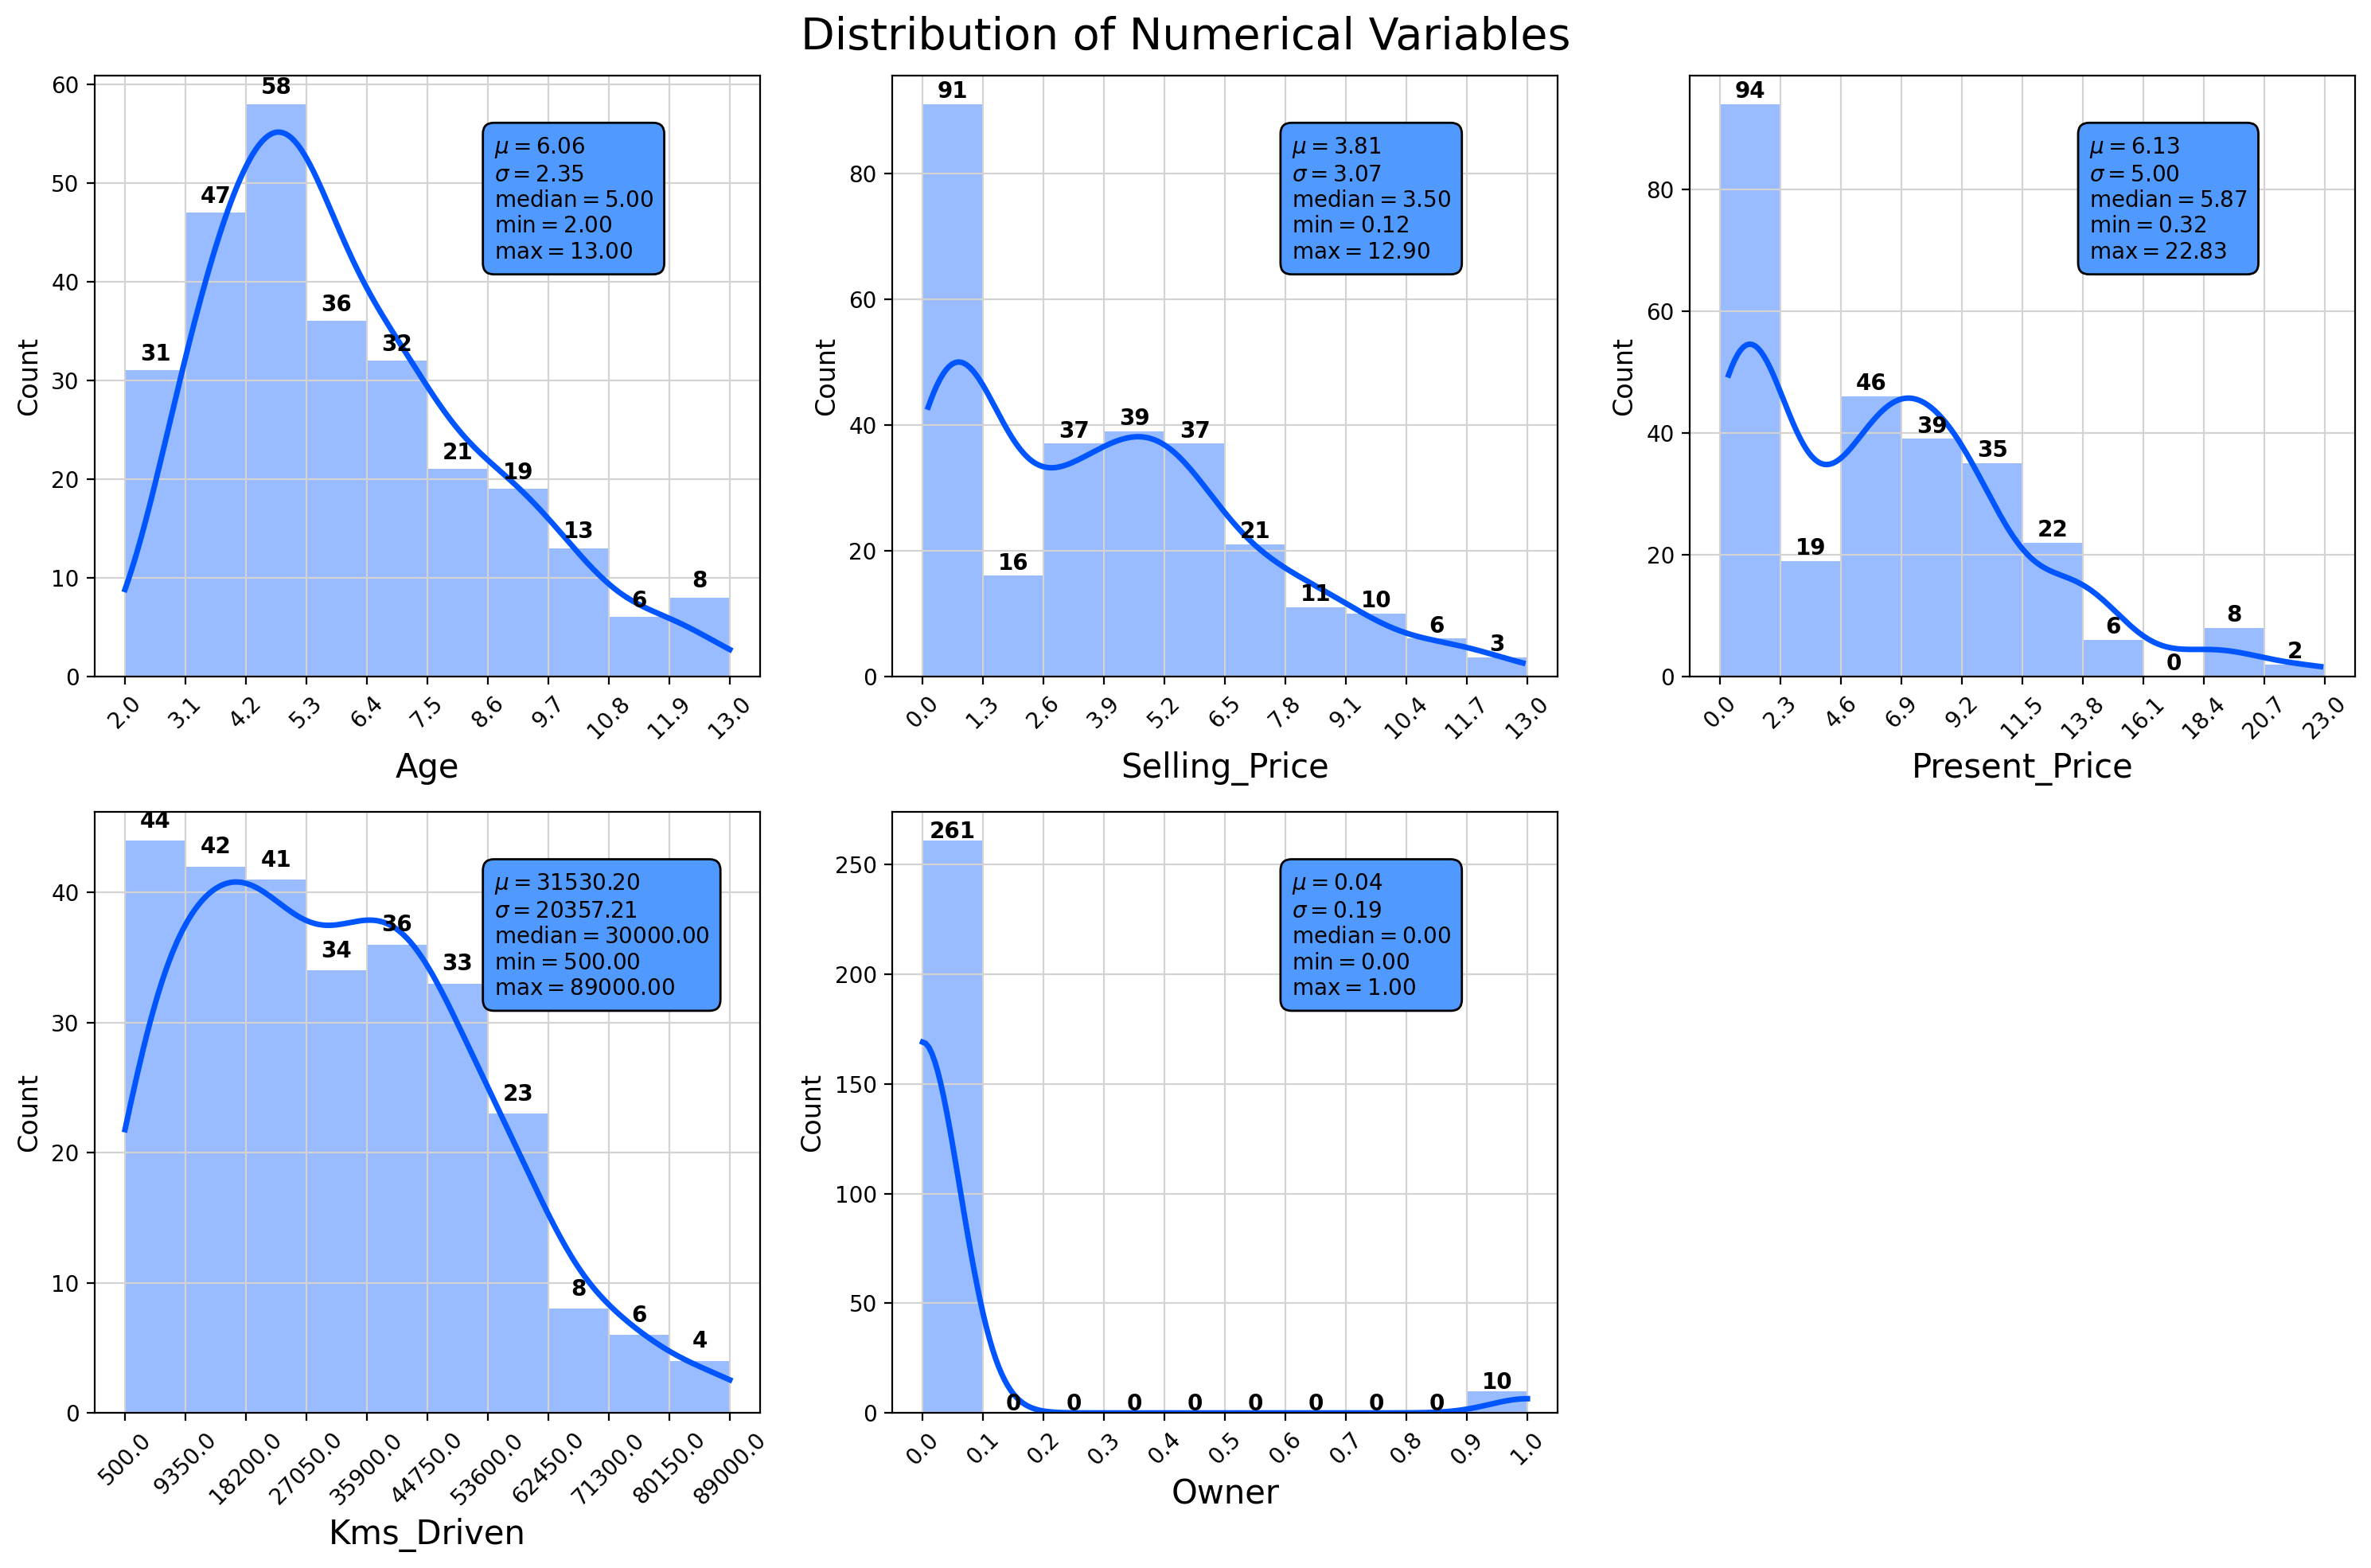

In [15]:
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'
df1 = df_processed
for i in range(len(NumCols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df1[NumCols[i]], 
                                     range=(np.floor(df1[NumCols[i]].min()), np.ceil(df1[NumCols[i]].max())))                
    graph = sns.histplot(data=df1, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")
    
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %df1[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %df1[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[NumCols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
plt.tight_layout()   
plt.show()


### Target vs. Numerical Features Bivariate Analysis 5.4

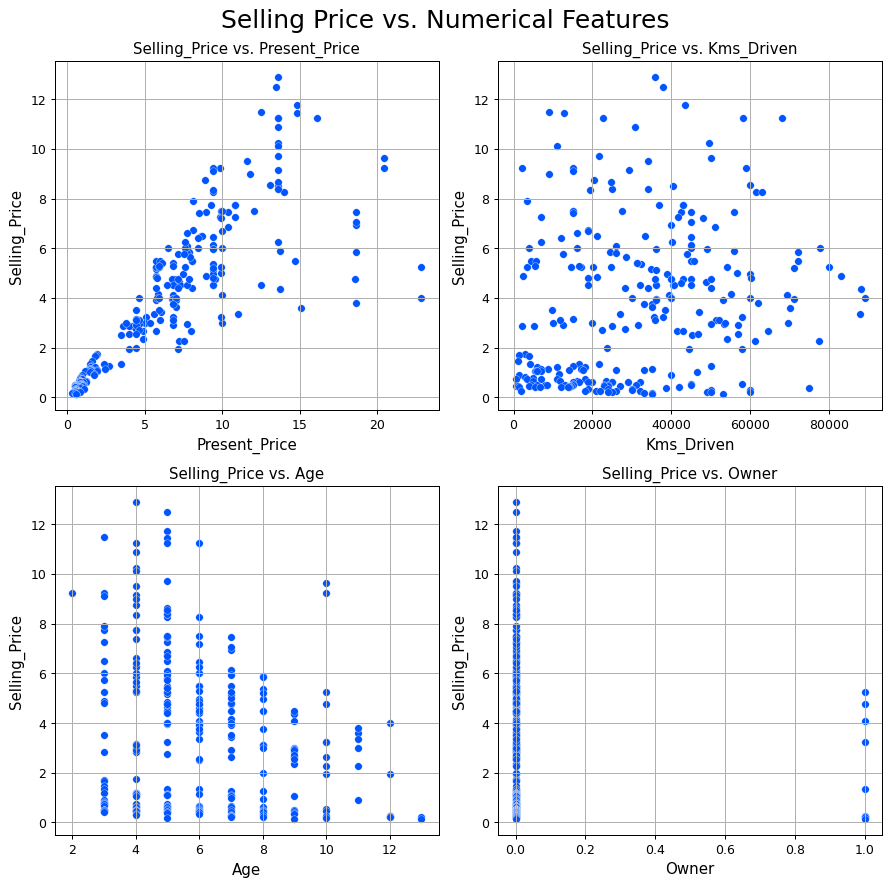

In [16]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

### Target vs. Categorical Features Bivariate Analysis 5.5

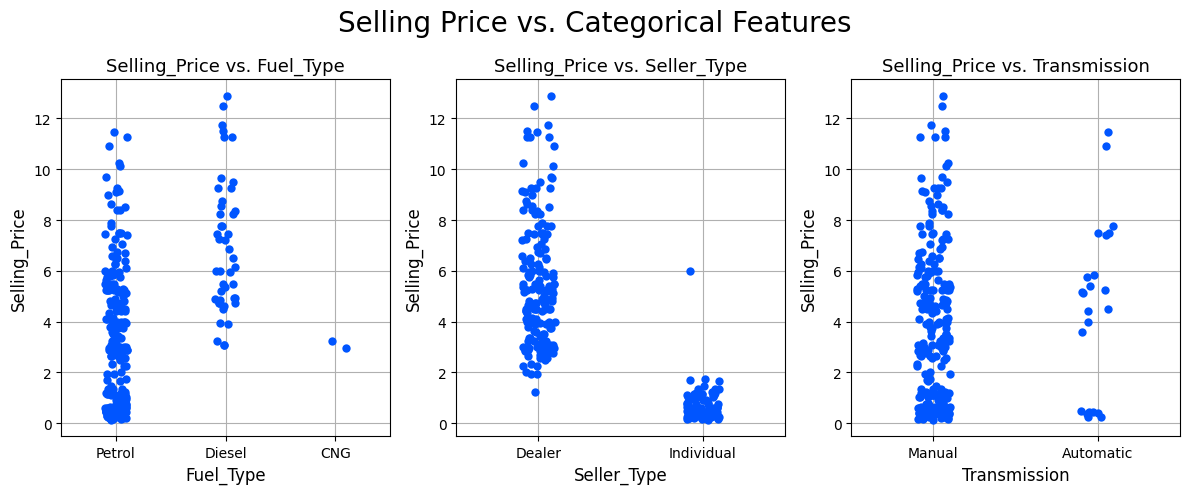

In [17]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

### Multivariate Analysis 5.6

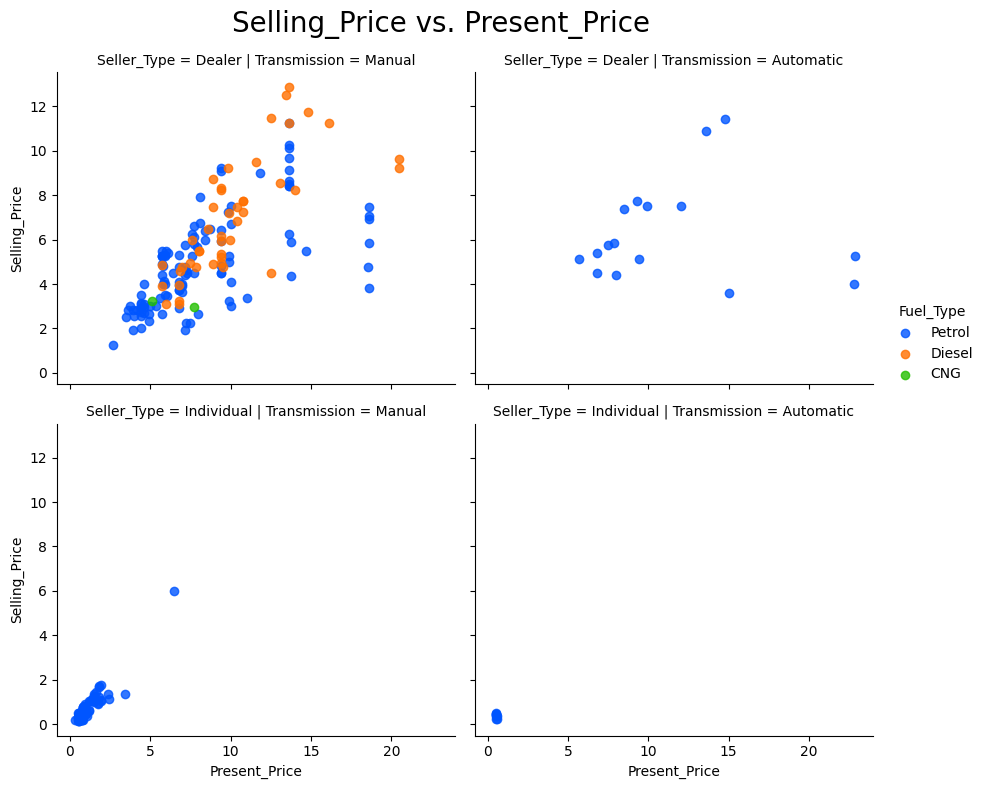

In [18]:
graph = sns.lmplot(x='Present_Price', y='Selling_Price', data= df1, fit_reg=False, row='Seller_Type',
                   col='Transmission', hue='Fuel_Type', palette=CustomPalette, height=4, aspect=1)   

plt.suptitle('Selling_Price vs. Present_Price', fontsize=20) 
sns.move_legend(graph, "lower center", bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.tight_layout()
plt.show()

# Categorical Variables Encoding 6.0

### Label Encoding 6.1

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_arr = label_encoder.fit_transform(df_processed['Transmission'])
df_processed['Transmission'] = encoded_arr
df_processed

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,1,0,6
1,4.75,9.54,43000,Diesel,Dealer,1,0,7
2,7.25,9.85,6900,Petrol,Dealer,1,0,3
3,2.85,4.15,5200,Petrol,Dealer,1,0,9
4,4.60,6.87,42450,Diesel,Dealer,1,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,1,0,4
297,4.00,5.90,60000,Petrol,Dealer,1,0,5
298,3.35,11.00,87934,Petrol,Dealer,1,0,11
299,11.50,12.50,9000,Diesel,Dealer,1,0,3


### One hot encoding 6.2

In [20]:
dum = pd.get_dummies( df_processed,prefix =['Fuel_Type','Seller_Type'],dtype=int )
dum


,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual
0,3.35,5.59,27000,1,0,6,0,0,1,1,0
1,4.75,9.54,43000,1,0,7,0,1,0,1,0
2,7.25,9.85,6900,1,0,3,0,0,1,1,0
3,2.85,4.15,5200,1,0,9,0,0,1,1,0
4,4.60,6.87,42450,1,0,6,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,4,0,1,0,1,0
297,4.00,5.90,60000,1,0,5,0,0,1,1,0
298,3.35,11.00,87934,1,0,11,0,0,1,1,0
299,11.50,12.50,9000,1,0,3,0,1,0,1,0


## Saving dataset 7.0

In [21]:
from pathlib import Path  
filepath = Path('/Users/samir/Documents/Data_science_5projects/Project_2/notebook/data/Transform_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
dum.to_csv(filepath , index=False) 